In [30]:
import re
import numpy as np
import pandas as pd
import requests 
from bs4 import BeautifulSoup 
import warnings
from requests.packages.urllib3.exceptions import InsecureRequestWarning
warnings.simplefilter('ignore',InsecureRequestWarning)

A continuación, realizaré el Scraping de la información de los resultados del plebiscito realizado en colombia el 2 de Octubre del año 2016. 

Para este proceso, se hizo un muestreo de 1122 municipios del total informado en esta votación.

Este es el link de la información: https://elecciones.registraduria.gov.co/pre_plebis_2016/99PL/DPLZZZZZZZZZZZZZZZZZ_L1.htm

In [4]:
html = requests.get("https://elecciones.registraduria.gov.co/pre_plebis_2016/99PL/DPLZZZZZZZZZZZZZZZZZ_L1.htm", verify=False).text
# estructurar datos a partir de archivos HTML
soup = BeautifulSoup(html, "lxml")
depa=re.findall('<a href="../99PL/DP["\w\s.>]+', str(soup))[2:-1]

In [5]:
departamentos=pd.DataFrame()
departamentos['link1']=depa

In [6]:
depa

['<a href="../99PL/DPL60ZZZZZZZZZZZZZZZ_L1.htm">AMAZONAS',
 '<a href="../99PL/DPL01ZZZZZZZZZZZZZZZ_L1.htm">ANTIOQUIA',
 '<a href="../99PL/DPL40ZZZZZZZZZZZZZZZ_L1.htm">ARAUCA',
 '<a href="../99PL/DPL03ZZZZZZZZZZZZZZZ_L1.htm">ATLANTICO',
 '<a href="../99PL/DPL16ZZZZZZZZZZZZZZZ_L1.htm">BOGOTA D.C.',
 '<a href="../99PL/DPL05ZZZZZZZZZZZZZZZ_L1.htm">BOLIVAR',
 '<a href="../99PL/DPL07ZZZZZZZZZZZZZZZ_L1.htm">BOYACA',
 '<a href="../99PL/DPL09ZZZZZZZZZZZZZZZ_L1.htm">CALDAS',
 '<a href="../99PL/DPL44ZZZZZZZZZZZZZZZ_L1.htm">CAQUETA',
 '<a href="../99PL/DPL46ZZZZZZZZZZZZZZZ_L1.htm">CASANARE',
 '<a href="../99PL/DPL11ZZZZZZZZZZZZZZZ_L1.htm">CAUCA',
 '<a href="../99PL/DPL12ZZZZZZZZZZZZZZZ_L1.htm">CESAR',
 '<a href="../99PL/DPL17ZZZZZZZZZZZZZZZ_L1.htm">CHOCO',
 '<a href="../99PL/DPL13ZZZZZZZZZZZZZZZ_L1.htm">CORDOBA',
 '<a href="../99PL/DPL15ZZZZZZZZZZZZZZZ_L1.htm">CUNDINAMARCA',
 '<a href="../99PL/DPL50ZZZZZZZZZZZZZZZ_L1.htm">GUAINIA',
 '<a href="../99PL/DPL54ZZZZZZZZZZZZZZZ_L1.htm">GUAVIARE',
 '<a hr

In [7]:
departamentos['link']=departamentos['link1'].map(lambda x:x.replace('<a href="../', '').replace("</a></li>", "").replace('">', ",")).map(lambda x:x[:32])
departamentos['departamento']=departamentos['link1'].map(lambda x:x.replace('<a href="../', '').replace("</a></li>", "").replace('">', ",")).map(lambda x:x[33:])


In [8]:
departamentos['departamento']=np.where(departamentos['departamento']=='LA', 'LA GUAJIRA', 
                                       np.where(departamentos['departamento']=='SAN', 'SAN ANDRES', 
                                                np.where(departamentos['departamento']=='NARIÃ\x91O', 'NARIÑO',
                                                         np.where(departamentos['departamento']=='NORTE DE SAN', 'NORTE DE SANTANDER', departamentos['departamento']))))

In [9]:
departamentos1=departamentos[['link', 'departamento']]

In [15]:
def func_mun(link, departamento):
    html = requests.get("https://elecciones.registraduria.gov.co/pre_plebis_2016/"+link, verify=False).text
# estructurar datos a partir de archivos HTML
    soup = BeautifulSoup(html, "lxml")
    muni=re.findall('<option value="../99PL/DPL["\w\s.>]+', str(soup))
    municipios=pd.DataFrame()
    municipios['link1']=muni
    municipios['numeros']=municipios['link1'].map(lambda x:re.findall('[\d]+', str(x)))
    municipios['indicativos']=municipios['numeros'].map(lambda x:len(x[1]))
    municipios1=municipios[municipios['indicativos']>2]
    municipios1['link']=municipios1['link1'].map(lambda x:x.replace('<option value="../', '')).map(lambda x:x[:32])
    municipios1['municipio']=municipios1['link1'].map(lambda x:x.replace('<option value="../', '')).map(lambda x:x[34:])
    municipios1['departamento']=departamento
    return municipios1

In [16]:
total=pd.DataFrame()
for i in range(len(departamentos1)):
    print("Iteracion",i)
    total=total.append(func_mun(departamentos1['link'][i],departamentos1['departamento'][i] ))
total=total.reset_index(drop=True)

Iteracion 0


C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

Iteracion 1
Iteracion 2
Iteracion 3
Iteracion 4
Iteracion 5
Iteracion 6
Iteracion 7
Iteracion 8
Iteracion 9
Iteracion 10
Iteracion 11
Iteracion 12
Iteracion 13
Iteracion 14
Iteracion 15
Iteracion 16
Iteracion 17
Iteracion 18
Iteracion 19
Iteracion 20
Iteracion 21
Iteracion 22
Iteracion 23
Iteracion 24
Iteracion 25
Iteracion 26
Iteracion 27
Iteracion 28
Iteracion 29
Iteracion 30
Iteracion 31
Iteracion 32
Iteracion 33


In [17]:
total.departamento.value_counts()

ANTIOQUIA             125
BOYACA                123
CUNDINAMARCA          116
SANTANDER              87
NARIÑO                 64
CONSULADOS             64
TOLIMA                 47
BOLIVAR                46
CAUCA                  42
VALLE                  42
NORTE DE SANTANDER     40
HUILA                  37
CORDOBA                30
MAGDALENA              30
CHOCO                  30
META                   29
CALDAS                 27
SUCRE                  26
CESAR                  25
ATLANTICO              23
CASANARE               19
CAQUETA                16
LA GUAJIRA             15
RISARALDA              14
PUTUMAYO               13
QUINDIO                12
AMAZONAS               11
GUAINIA                 9
ARAUCA                  7
VAUPES                  6
GUAVIARE                4
VICHADA                 4
SAN ANDRES              2
BOGOTA D.C.             1
Name: departamento, dtype: int64

In [19]:
total.columns

Index(['link1', 'numeros', 'indicativos', 'link', 'municipio', 'departamento'], dtype='object')

In [21]:
total1=total[['link', 'municipio', 'departamento']]

In [22]:
total1.shape

(1186, 3)

In [23]:
total1.head()

,link,municipio,departamento
0,99PL/DPL60010ZZZZZZZZZZZZ_L1.htm,EL ENCANTO,AMAZONAS
1,99PL/DPL60013ZZZZZZZZZZZZ_L1.htm,LA CHORRERA,AMAZONAS
2,99PL/DPL60016ZZZZZZZZZZZZ_L1.htm,LA PEDRERA,AMAZONAS
3,99PL/DPL60017ZZZZZZZZZZZZ_L1.htm,LA VICTORIA,AMAZONAS
4,99PL/DPL60001ZZZZZZZZZZZZ_L1.htm,LETICIA,AMAZONAS


In [31]:
def busqueda(link):
    html = requests.get("https://elecciones.registraduria.gov.co/pre_plebis_2016/"+link, verify=False).text
    # estructurar datos a partir de archivos HTML
    soup = BeautifulSoup(html, "lxml")
    a=re.findall('<div class="cajaDatosHeader"><b>[\w\s+%.-]+|<div class="cajaDatosBody"><span class="porcentajesCajas">[\w,+%.-]+|</span><br/><span class="descripcionCaja">[\w,\s%.-]+', str(soup))
    ba=[]
    ba.append(a[1])
    bb=[]
    bb.append(a[2])
    m=re.search("([\w]+) de ([\w]+)", str(bb))
    bc=[]
    bc.append(a[4])
    bd=[]
    bd.append(a[5])
    v1=re.findall("[\d.]+", str(bd))[0]
    v2=re.findall("[\d.]+", str(bd))[1]
    b=re.findall('<div class="skill-bar-percent pVotos">[\w,%()\s.]+|<div class="skill-bar-percent">[\w,()%\s.]+|<div class="skillbar-title"><span>[\w(),%\s.]+', str(soup))
    be=[]
    be.append(b[1])
    app=re.findall("[\d,%.]+", str(be))


    bf=[]
    bf.append(b[2])
    ap=re.search("[\d.]+", str(bf))

    bg=[]
    bg.append(b[4])
    noapp=re.findall("[\d,%.]+", str(bg))

    bh=[]
    bh.append(b[5])
    noap=re.search("[\d.]+", str(bh))
    c=re.findall('<div class="contenido"><b>[\w\s.¡]+|</b><br/>[\d.]+', str(soup))
    ca=[]
    ca.append(c[1])
    nu1=re.findall("[\d.]+", str(ca).replace("</b><br/>", ""))
    cb=[]
    cb.append(c[3])
    nu2=re.findall("[\d.]+", str(cb))
    cc=[]
    cc.append(c[5])
    nu3=re.findall("[\d.]+", str(cc))

    base=pd.DataFrame()

    base['link_real']=''
    base['nombre_muni']=''
    base['nombre_dep']=''
    base['mesas_informadas%']=ba
    base['mesas_informadas%']=base['mesas_informadas%'].map(lambda x:x.replace('<div class="cajaDatosBody"><span class="porcentajesCajas">',""))
    base["mesas_informadas%"]=base["mesas_informadas%"].map(lambda x:str(x).replace("%","").replace(",",".")).astype(float)
    base['mesas_usadas']=m.group(1)
    base['mesas_usadas']=base['mesas_usadas'].map(lambda x:str(x).replace("%","").replace(".","")).astype(int)
    base['mesas_disponibles']=m.group(2)
    base['mesas_disponibles']=base['mesas_disponibles'].map(lambda x:str(x).replace("%","").replace(".","")).astype(int)

    base['votantes%']=bc
    base['votantes%']=base['votantes%'].map(lambda x:x.replace('<div class="cajaDatosBody"><span class="porcentajesCajas">',""))
    base["votantes%"]=base["votantes%"].map(lambda x:str(x).replace("%","").replace(",",".")).astype(float)
    try:
        base['votantes_cumplieron']=v1
        base['votantes_cumplieron']=base['votantes_cumplieron'].map(lambda x:str(x).replace("%","").replace(".","")).astype(int)
        base['votantes_habilidatos']=v2
        base['votantes_habilidatos']=base['votantes_habilidatos'].map(lambda x:str(x).replace("%","").replace(".","")).astype(int)
    except:
        base['votantes_cumplieron']=None
        base['votantes_habilidatos']=None
    base['apoya%']=app
    base["apoya%"]=base["apoya%"].map(lambda x:str(x).replace("%","").replace(",",".")).astype(float)
    base['apoya#']=ap.group(0)
    base['apoya#']=base['apoya#'].map(lambda x:str(x).replace(".","")).astype(int)
    base['no_apoya%']=noapp
    base["no_apoya%"]=base["no_apoya%"].map(lambda x:str(x).replace("%","").replace(",",".")).astype(float)
    base['no_apoya#']=noap.group(0)
    base['no_apoya#']=base['no_apoya#'].map(lambda x:str(x).replace(".","")).astype(int)
    base['votos_validos']=nu1
    base['votos_validos']=base['votos_validos'].map(lambda x:str(x).replace("%","").replace(".","")).astype(int)
    base['votos_no_marcados']=nu2
    base['votos_no_marcados']=base['votos_no_marcados'].map(lambda x:str(x).replace("%","").replace(".","")).astype(int)
    base['votos_anulados']=nu3
    base["votos_anulados"]=base["votos_anulados"].map(lambda x:str(x).replace(".","")).astype(int)
    return base


In [24]:
total1.columns

Index(['link', 'municipio', 'departamento'], dtype='object')

In [ ]:
base_total=pd.DataFrame()
for i in range(len(total1['link'])):
    print("Iteracion:",i)
    base=busqueda(total1['link'][i])
    base_total=base_total.append(base)
base_total=base_total.reset_index(drop=True)
base_total['link_real']=total1['link']
base_total['nombre_muni']=total1['municipio']
base_total['nombre_dep']=total1['departamento']

In [33]:
base_total.head()

,link_real,nombre_muni,nombre_dep,mesas_informadas%,mesas_usadas,mesas_disponibles,votantes%,votantes_cumplieron,votantes_habilidatos,apoya%,apoya#,no_apoya%,no_apoya#,votos_validos,votos_no_marcados,votos_anulados
0,99PL/DPL60010ZZZZZZZZZZZZ_L1.htm,EL ENCANTO,AMAZONAS,100.0,2,2,30.01,223,743,76.92,170,23.07,51,221,0,2
1,99PL/DPL60013ZZZZZZZZZZZZ_L1.htm,LA CHORRERA,AMAZONAS,100.0,3,3,35.53,366,1030,82.87,300,17.12,62,362,1,3
2,99PL/DPL60016ZZZZZZZZZZZZ_L1.htm,LA PEDRERA,AMAZONAS,100.0,3,3,21.42,216,1008,88.31,189,11.68,25,214,1,1
3,99PL/DPL60017ZZZZZZZZZZZZ_L1.htm,LA VICTORIA,AMAZONAS,100.0,1,1,27.77,5,18,80.00,4,20.00,1,5,0,0
4,99PL/DPL60001ZZZZZZZZZZZZ_L1.htm,LETICIA,AMAZONAS,100.0,82,82,25.98,8990,34592,49.66,4403,50.33,4463,8866,40,84


In [34]:
#base_total.to_excel("base_total1.xlsx")
base_total.to_csv("base_total1.csv", encoding='utf-8', index=False)

In [ ]:
#! pip install pdf2image
#! conda install -c conda-forge poppler

# importing all the required modules
from pdf2image import convert_from_path
pages = convert_from_path('Plebiscito_Colombia.pdf', 500)
for i in range(len(pages)):
    pages[i].save('%s.jpg'%i, 'JPEG')

Populating the interactive namespace from numpy and matplotlib


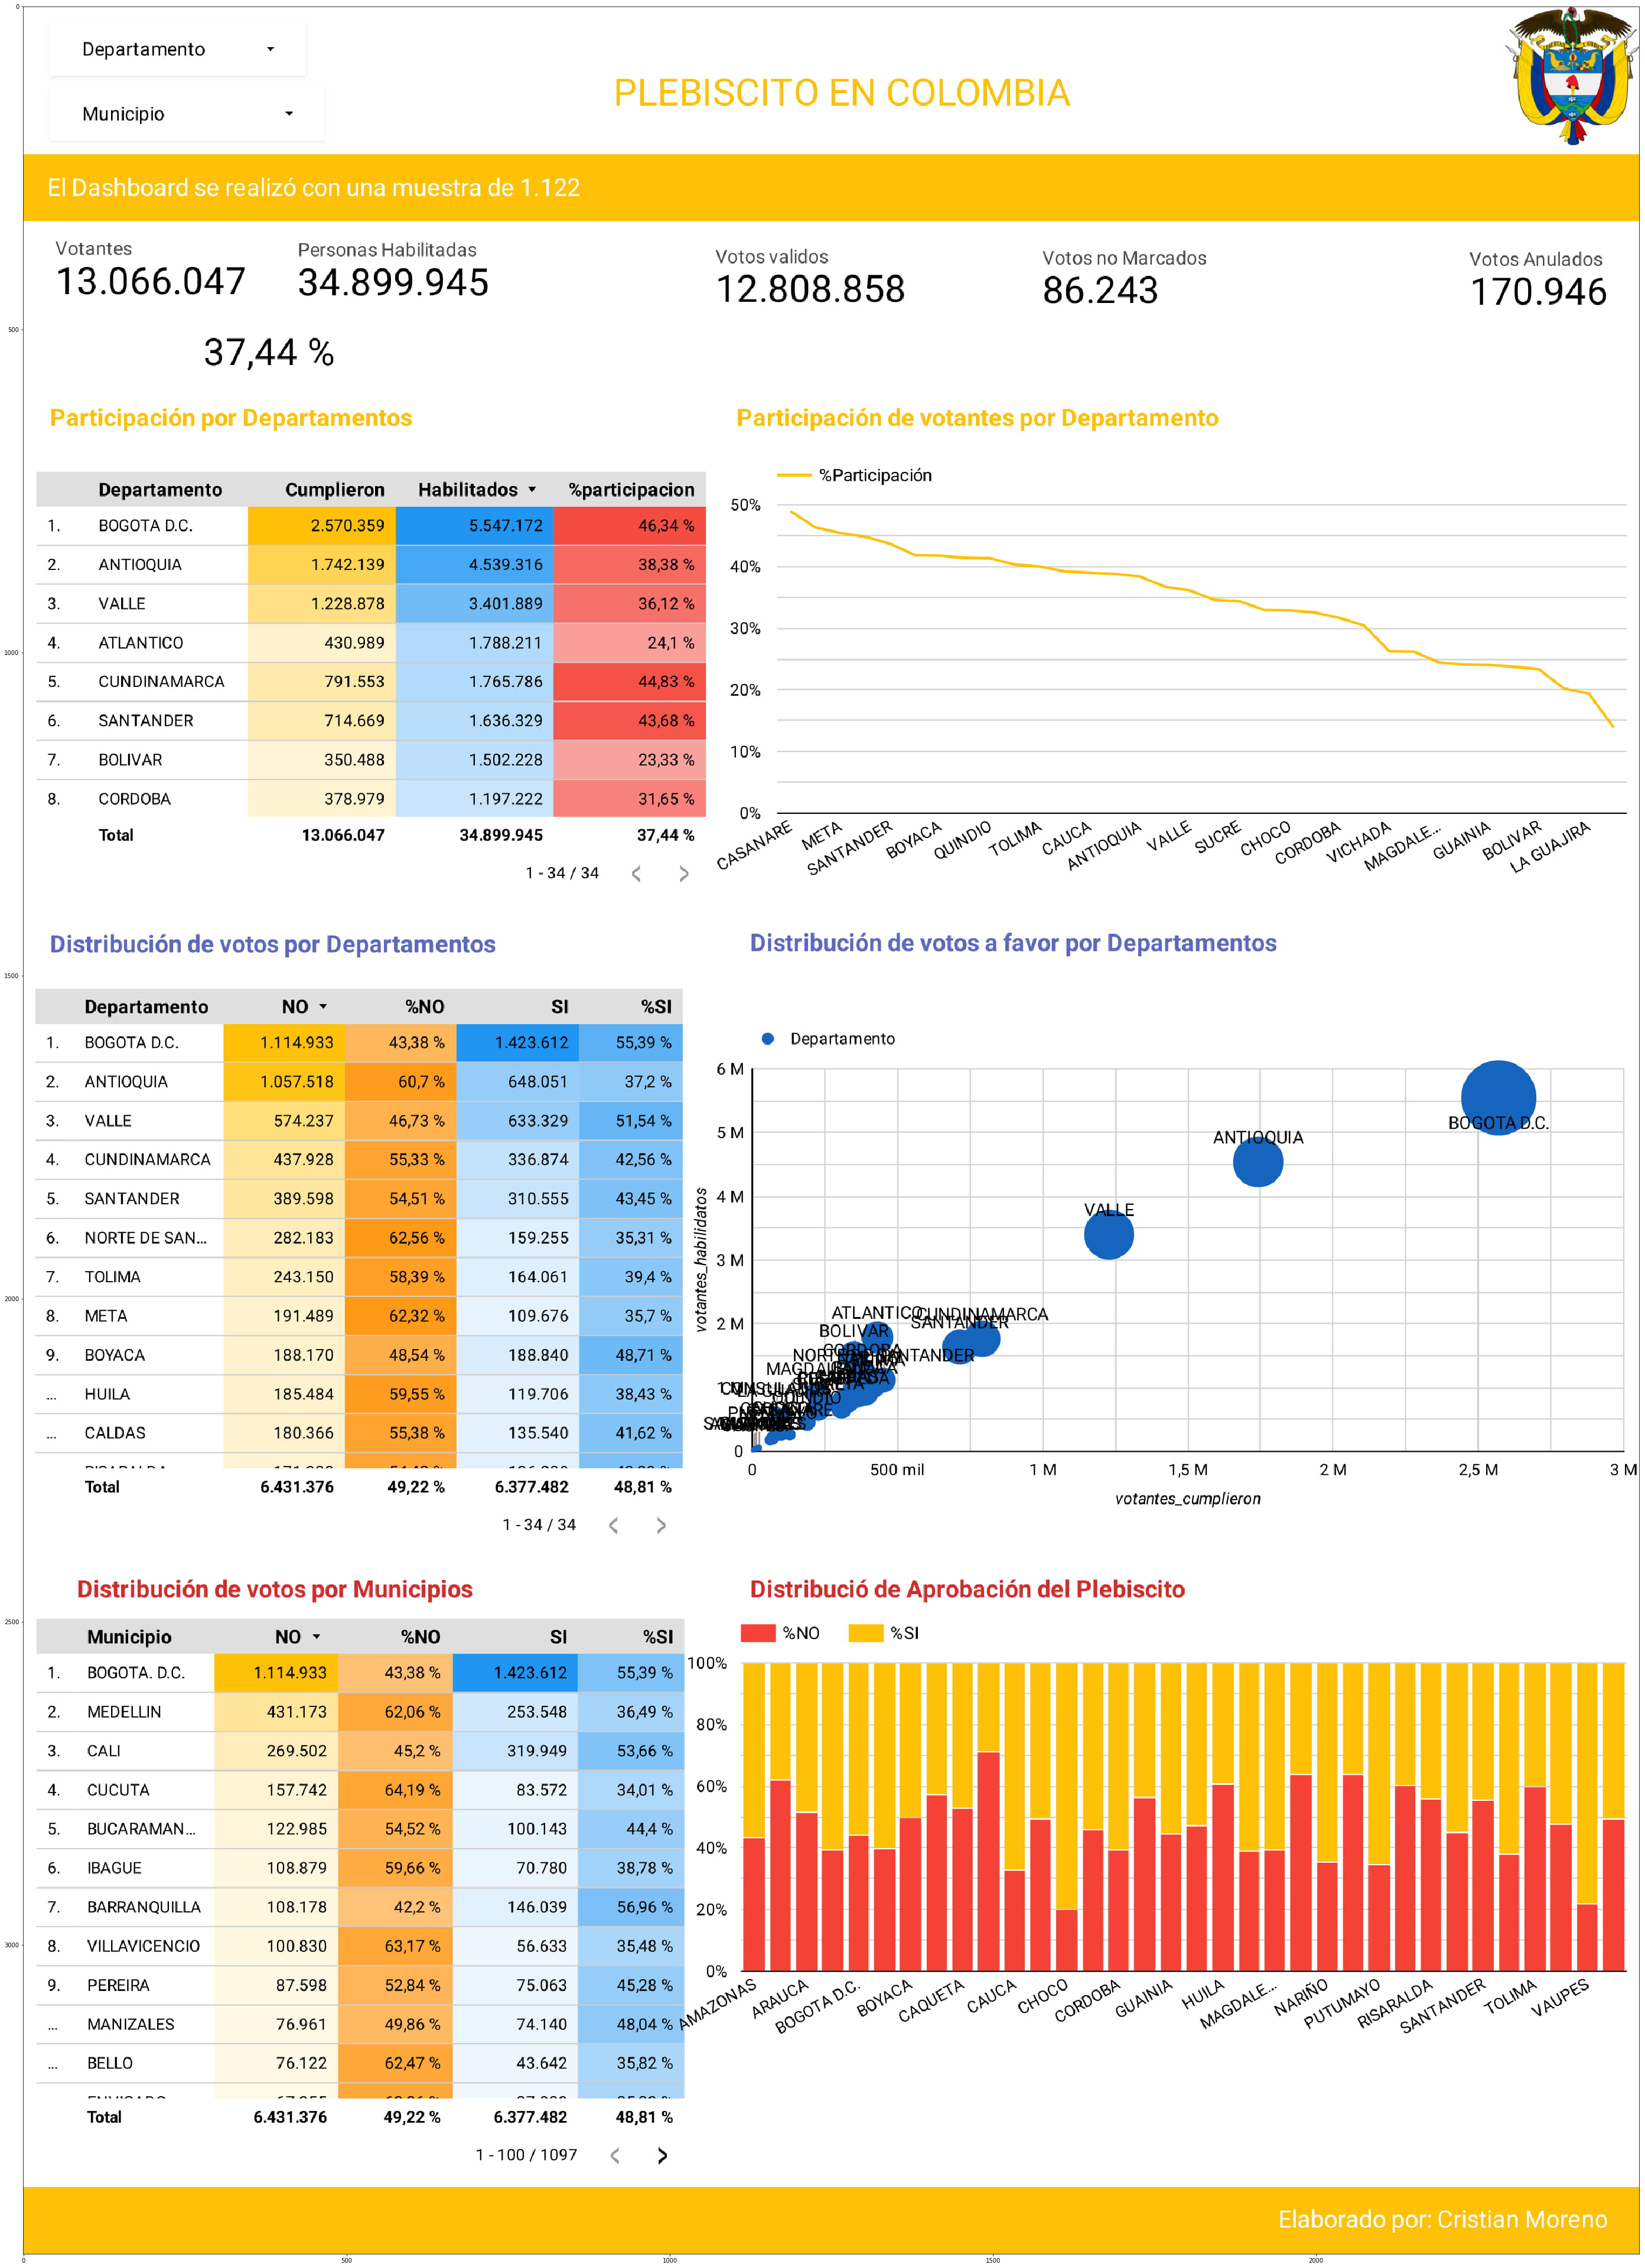

In [1]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('0.jpg')
fig = plt.figure()
fig.set_size_inches(500,70)
imgplot = plt.imshow(img)

plt.show();

A continuación se encuentra el link del informe realizado en DataStudio con base a los datos del Scraping realizado en este Script.
https://datastudio.google.com/s/ihmTvRRTqYs

El paso siguiente a esto, se propone analizar las votaciones según el PIB real por departamento para ver patrones de comportamiento